Sum(nums)= 23418
Right answer= 2341.8


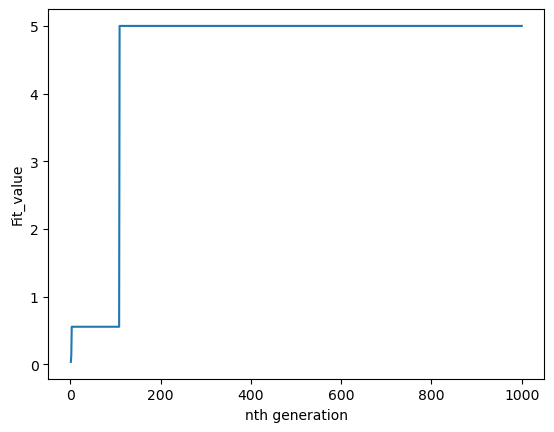

Given optimal solution= [85, 366, 366, 224, 35, 350, 135, 190, 397, 194]
sum(solution)= 2342
Fitness function value= 5.0000000000045475


In [4]:
"""
题目：在一个长度为n的数组nums中选择10个元素，
使得10个元素的和与原数组的所有元素之和的1/10无限接近
例如：n=50,sum(nums)=1000, 选择的元素列表answer要满足|sum（answer)-10|<e,e尽可能小
"""

"""
遗传算法：
1.创建随机解集
2.两解交换信息---适应度函数f(x)=1/error
3.选择信息变异
4.去除劣势的解(与2合并为一个函数)
"""

import random
import numpy
import matplotlib.pyplot as plt

def create_answer(number_set,n): #创建随机解集
    result=[]
    for i in range(n):
        result.append(random.sample(number_set,10))
    return result

# 产生选择概率
def Fitness_value(new_answer,number_set):
    Fit_value=[]
    right_value=sum(number_set)/10
    for item in new_answer:
        error=abs(sum(item)-right_value)
        if error==0:
            Fit_value.append(10) # error最小设为0.1(<1)
        else:
            Fit_value.append(1/error)
    return Fit_value

# 产生后代（优秀父母繁衍） --- 染色体交叉
def Genetic_crossover(old_answer,number_set):
    result=[] # 保存后代
    Fitvalue=Fitness_value(old_answer,number_set)
    # 适应度函数归一化
    Fitvalue=[item/sum(Fitvalue) for item in Fitvalue]
    for i in range(1,len(Fitvalue)):
        Fitvalue[i]+=Fitvalue[i-1]
    # 轮盘选择算子进行繁衍
    for pairs in range(len(old_answer)//2):
        tmp=[] # 保存父母队
        # 随机选择一对父/母亲
        for j in range(2):
            rand=random.uniform(0,1)
            for k in range(len(Fitvalue)):
                # Fitvalue最左侧
                if k==0:
                    if rand<Fitvalue[k]:
                        tmp.append(old_answer[k])
                else:
                    if rand>=Fitvalue[k-1] and rand<Fitvalue[k]:
                        tmp.append(old_answer[k])
        # 染色体交叉
        rand = random.randint(0, len(tmp[0]) - 4)
        # 取中间的三个基因交换
        tmp1=tmp[0][:rand]+tmp[1][rand:rand+3]+tmp[0][rand+3:]
        tmp2=tmp[1][:rand]+tmp[0][rand:rand+3]+tmp[1][rand+3:]
        result.append(tmp1)
        result.append(tmp2)
    return result

# 变异 -- threshold:变异概率,变异位置的值从总体中随机选择
def variation(old_answer,number_set,threshold):
    for i in range(len(old_answer)-1):
        rand=random.uniform(0,1)
        if rand<threshold: # 此时产生变异
            place=random.randint(0,9) # 随机变异位置
            old_answer[i]=old_answer[i][:place]+random.sample(number_set,1)+old_answer[i][place+1:]
    return old_answer


number_set=random.sample(range(0,1000),50)
# random.sample(list,number) —— 从list中随机抽取number个元素
middle_answer=create_answer(number_set,100) # 产生100个初始解集
Elite=[] # 保存各代中最优的 (精英)
for i in range(1000):
    middle_answer=Genetic_crossover(middle_answer,number_set)
    middle_answer=variation(middle_answer,number_set,0.1) #变异概率为0.1
    Fitvalue=Fitness_value(middle_answer,number_set)
    # 选出当代中最优的
    index=Fitvalue.index(max(Fitvalue))
    # 当代最优保存类型[answer,Fitvalue]
    Elite.append([middle_answer[index],Fitvalue[index]])

#输出结果
print("Sum(nums)=",sum(number_set))
print("Right answer=",sum(number_set)/10)
# 可视化Fitvalue
plt.figure(1)
x=[i+1 for i in range(len(Elite))]
y=list(Elite[i][1] for i in range(len(Elite)))
plt.plot(x,y)
plt.xlabel("nth generation")
plt.ylabel("Fit_value")
plt.show()

# 从各代精英中选出最牛逼的那一位精英
Elite.sort(key=lambda x:x[1],reverse=True)
print("Given optimal solution=",Elite[0][0])
print("sum(solution)=",sum(Elite[0][0]))
print("Fitness function value=",Elite[0][1])
